#  <span style="color:orange">Multiclass Classification Tutorial (MCLF101) - Level Beginner</span>

# 1.0 Research Project - Roop Malhans
# 1.1 Installing PyCaret
The first step to get started with PyCaret is to install pycaret. Installation is easy and will only take a few minutes. Follow the instructions below:

# Installing PyCaret in Local Jupyter Notebook
`pip install pycaret`  <br />

# Installing PyCaret on Google Colab or Azure Notebooks
`!pip install pycaret`


# 1.2 Pre-Requisites
- Python 3.6 or greater
- PyCaret 2.0 or greater
- Internet connection to load data from pycaret's repository
- Basic Knowledge of Multiclass Classification

# 1.3 For Google colab users:
If you are running this notebook on Google colab, run the following code at top of your notebook to display interactive visuals.<br/>
<br/>
`from pycaret.utils import enable_colab` <br/>
`enable_colab()`

# 1.4 See also:
- __[Binary Classification Tutorial (CLF101) - Level Beginner](https://github.com/pycaret/pycaret/blob/master/tutorials/Binary%20Classification%20Tutorial%20Level%20Beginner%20-%20%20CLF101.ipynb)__
- __[Binary Classification Tutorial (CLF102) - Level Intermediate](https://github.com/pycaret/pycaret/blob/master/tutorials/Binary%20Classification%20Tutorial%20Level%20Intermediate%20-%20CLF102.ipynb)__

In [1]:
!pip install --pre pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 487 kB 6.4 MB/s 
     |████████████████████████████████| 280 kB 36.4 MB/s 
     |████████████████████████████████| 1.5 MB 48.4 MB/s 
     |████████████████████████████████| 45 kB 887 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 7.0 MB 47.7 MB/s 
     |████████████████████████████████| 9.4 MB 40.6 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 72 kB 850 kB/s 
     |████████████████████████████████| 141 kB 69.7 MB/s 
     |████████████████████████████████| 43 kB 676 kB/s 
     |████████████████████████████████| 2.0 MB 44.2 MB/s 
     |████████████████████████████████| 79.9 MB 97 kB/s 
     |████████████████████████████████| 106 kB 58.6 MB/s 
     |█████████████████████████

# 2.0 What is Multiclass Classification?
Multiclass classification is a supervised machine learning technique where the goal is to classify instances into one of three or more classes. (Classifying instances into one of two classes is called Binary Classification). Multiclass classification should not be confused with multi-label classification, where multiple labels are to be predicted for each instance.

__[Learn More about Multiclass Classification](https://towardsdatascience.com/machine-learning-multiclass-classification-with-imbalanced-data-set-29f6a177c1a)__

# 3.0 Overview of the Classification Module in PyCaret
PyCaret's classification module (`pycaret.classification`) is a supervised machine learning module which is used for classifying the elements into binary or multinomial groups based on various techniques and algorithms. 

The PyCaret classification module can be used for Binary or Multi-class classification problems. It has over 18 algorithms and 14 plots to analyze the performance of models. Be it hyper-parameter tuning, ensembling or advanced techniques like stacking, PyCaret's classification module has it all.

# 4.0 Dataset for the Tutorial

:For this project I have used **White Wine dataset**



# 5.0 Getting the Data

To download the dataset: https://archive.ics.uci.edu/ml/datasets/Wine+Quality

In [2]:
!wget -q https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv


In [4]:
import pandas as pd
df = pd.read_csv('winequality-white.csv', sep = ";")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [5]:
#check the shape of data
df.shape

(4898, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In order to demonstrate the `predict_model()` function on unseen data, a sample of 15 records has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 15 records were not available at the time when the machine learning experiment was performed.

In [7]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (4408, 12)
Unseen Data For Predictions: (490, 12)


# 6.0 Setting up the Environment in PyCaret

The `setup()` function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. `setup()` must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline (we will see them in later tutorials).

When `setup()` is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after `setup()` is executed. If all of the data types are correctly identified `enter` can be pressed to continue or `quit` can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In later tutorials we will learn how to overwrite PyCaret's infered data type using the `numeric_features` and `categorical_features` parameters in `setup()`.

In [10]:
from pycaret.classification import *
exp_mclf101 = setup(data = data, target = 'quality', session_id=123) 

,Description,Value
0,Session id,123
1,Target,quality
2,Target type,Multiclass
3,Target mapping,"3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5, 9: 6"
4,Original data shape,"(4408, 12)"
5,Transformed data shape,"(4408, 12)"
6,Transformed train set shape,"(3085, 12)"
7,Transformed test set shape,"(1323, 12)"
8,Numeric features,11
9,Preprocess,True


Once the setup has been successfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when `setup()` is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:

- **session_id :**  A pseduo-random number distributed as a seed in all functions for later reproducibility. If no `session_id` is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the `session_id` is set as `123` for later reproducibility.<br/>
<br/>
- **Target Type :**  Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.<br/>
<br/>
- **Label Encoded :**  When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. In this experiment label encoding is applied as follows: Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2. <br/>
<br/>
- **Original Data :**  Displays the original shape of the dataset. In this experiment (135, 5) means 135 samples and 5 features including the target column. <br/>
<br/>
- **Missing Values :**  When there are missing values in the original data this will show as True. For this experiment there are no missing values in the dataset.<br/>
<br/>
- **Numeric Features :**  The number of features inferred as numeric. In this dataset, 4 out of 5 features are inferred as numeric. <br/>
<br/>
- **Categorical Features :**  The number of features inferred as categorical. In this dataset, there are no categorical features. <br/>
<br/>
- **Transformed Train Set :**  Displays the shape of the transformed training set. Notice that the original shape of (135, 5) is transformed into (94, 4) for the transformed train set. <br/>
<br/>
- **Transformed Test Set :**  Displays the shape of the transformed test/hold-out set. There are 41 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using the `train_size` parameter in setup. <br/>

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation, categorical encoding etc. Most of the parameters in `setup()` are optional and used for customizing the pre-processing pipeline. These parameters are out of scope for this tutorial but as you progress to the intermediate and expert levels, we will cover them in much greater detail.

# 7.0 Comparing All Models

Comparing all models to evaluate performance is the recommended starting point for modeling once the setup is completed (unless you exactly know what kind of model you need, which is often not the case). This function trains all models in the model library and scores them using stratified cross validation for metric evaluation. The output prints a score grid that shows average Accuracy, Recall, Precision, F1, Kappa, and MCC accross the folds (10 by default) along with training times.

In [11]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6512,0.2491,0.6512,0.6486,0.6351,0.4547,0.4616,0.5780
et,Extra Trees Classifier,0.6457,0.2514,0.6457,0.6423,0.6297,0.4466,0.4535,0.6350
lightgbm,Light Gradient Boosting Machine,0.6360,0.2446,0.6360,0.6306,0.6248,0.4393,0.4427,0.9050
gbc,Gradient Boosting Classifier,0.5854,0.2292,0.5854,0.5823,0.5715,0.3539,0.3608,3.2340
dt,Decision Tree Classifier,0.5682,0.2071,0.5682,0.5677,0.5669,0.3589,0.3593,0.0610
lda,Linear Discriminant Analysis,0.5287,0.2099,0.5287,0.5130,0.5043,0.2501,0.2602,0.0520
ridge,Ridge Classifier,0.5268,0.0000,0.5268,0.4831,0.4633,0.2102,0.2350,0.0410
lr,Logistic Regression,0.5190,0.2022,0.5190,0.4792,0.4689,0.2072,0.2256,2.1050
qda,Quadratic Discriminant Analysis,0.4895,0.2140,0.4895,0.4970,0.4832,0.2569,0.2613,0.0480
knn,K Neighbors Classifier,0.4654,0.1965,0.4654,0.4536,0.4489,0.1703,0.1727,0.0610


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

Two simple words of code ***(not even a line)*** have trained and evaluated over 15 models using cross validation. The score grid printed above highlights the highest performing metric for comparison purposes only. The grid by default is sorted using 'Accuracy' (highest to lowest) which can be changed by passing the `sort` parameter. For example `compare_models(sort = 'Recall')` will sort the grid by Recall instead of `Accuracy`. If you want to change the fold parameter from the default value of `10` to a different value then you can use the `fold` parameter. For example `compare_models(fold = 5)` will compare all models on 5 fold cross validation. Reducing the number of folds will improve the training time. By default, `compare_models` return the best performing model based on default sort order but can be used to return a list of top N models by using `n_select` parameter.

**Note:** The `AUC` metric is not available for Multiclass classification however the column will still be shown with `zero` values to maintain consistency between the Binary Classification and Multiclass Classification display grids. 

# 8.0 Create a Model

Creating Models for top three models

# 8.1 Random Forest Classifier

In [12]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7023,0.0000,0.7023,0.6967,0.6803,0.5265,0.5425
1,0.6375,0.0000,0.6375,0.6199,0.6210,0.4346,0.4405
2,0.6375,0.8009,0.6375,0.6509,0.6248,0.4343,0.4398
3,0.6408,0.8473,0.6408,0.6241,0.6273,0.4470,0.4494
4,0.6731,0.8426,0.6731,0.6655,0.6545,0.4897,0.4952
5,0.6623,0.0000,0.6623,0.6595,0.6483,0.4751,0.4803
6,0.6851,0.0000,0.6851,0.7010,0.6755,0.5068,0.5154
7,0.6104,0.0000,0.6104,0.6034,0.5887,0.3866,0.3935
8,0.6234,0.0000,0.6234,0.6220,0.6052,0.4094,0.4160


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [13]:

print(rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)


# 8.2 Extra Tree Classifier

In [14]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6731,0.0000,0.6731,0.6705,0.6608,0.4908,0.4996
1,0.6375,0.0000,0.6375,0.6257,0.6204,0.4302,0.4396
2,0.6278,0.8209,0.6278,0.6392,0.6131,0.4172,0.4238
3,0.6408,0.8440,0.6408,0.6241,0.6277,0.4485,0.4505
4,0.6667,0.8496,0.6667,0.6599,0.6504,0.4828,0.4880
5,0.6591,0.0000,0.6591,0.6536,0.6469,0.4705,0.4761
6,0.6526,0.0000,0.6526,0.6571,0.6429,0.4594,0.4655
7,0.6104,0.0000,0.6104,0.6016,0.5891,0.3882,0.3945
8,0.6364,0.0000,0.6364,0.6297,0.6117,0.4274,0.4352


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

# 8.3 Light Gradient Boosting Machine

In [15]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6699,0.0000,0.6699,0.6715,0.6648,0.4947,0.4992
1,0.6375,0.0000,0.6375,0.6380,0.6270,0.4442,0.4462
2,0.6375,0.7902,0.6375,0.6440,0.6304,0.4432,0.4462
3,0.6440,0.8247,0.6440,0.6383,0.6341,0.4539,0.4561
4,0.6602,0.8316,0.6602,0.6332,0.6431,0.4766,0.4794
5,0.6136,0.0000,0.6136,0.6106,0.6086,0.4127,0.4138
6,0.6396,0.0000,0.6396,0.6395,0.6323,0.4450,0.4482
7,0.6006,0.0000,0.6006,0.6035,0.5835,0.3763,0.3820
8,0.6396,0.0000,0.6396,0.6206,0.6222,0.4400,0.4449


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

# 9.0 Tune a Model

# 9.1 Random Forest Classifier

In [16]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5146,0.0000,0.5146,0.4910,0.4974,0.2449,0.2485
1,0.5049,0.0000,0.5049,0.4816,0.4895,0.2330,0.2352
2,0.4854,0.6760,0.4854,0.4552,0.4592,0.1828,0.1881
3,0.5113,0.6899,0.5113,0.4823,0.4935,0.2447,0.2466
4,0.5307,0.7066,0.5307,0.5274,0.4982,0.2442,0.2543
5,0.5487,0.0000,0.5487,0.5220,0.5275,0.2894,0.2955
6,0.5162,0.0000,0.5162,0.4755,0.4886,0.2382,0.2424
7,0.4968,0.0000,0.4968,0.4690,0.4824,0.2378,0.2384
8,0.5195,0.0000,0.5195,0.5216,0.4835,0.2185,0.2316


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [17]:
tuned_best = tune_model(best)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5146,0.0000,0.5146,0.4910,0.4974,0.2449,0.2485
1,0.5049,0.0000,0.5049,0.4816,0.4895,0.2330,0.2352
2,0.4854,0.6760,0.4854,0.4552,0.4592,0.1828,0.1881
3,0.5113,0.6899,0.5113,0.4823,0.4935,0.2447,0.2466
4,0.5307,0.7066,0.5307,0.5274,0.4982,0.2442,0.2543
5,0.5487,0.0000,0.5487,0.5220,0.5275,0.2894,0.2955
6,0.5162,0.0000,0.5162,0.4755,0.4886,0.2382,0.2424
7,0.4968,0.0000,0.4968,0.4690,0.4824,0.2378,0.2384
8,0.5195,0.0000,0.5195,0.5216,0.4835,0.2185,0.2316


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [18]:
#tuned model object is stored in the variable 'tuned_dt'. 
print(tuned_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)


# 9.2 Extra Tree Classifier

In [19]:
tuned_et = tune_model(et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5599,0.0000,0.5599,0.5346,0.5120,0.2706,0.2990
1,0.5502,0.0000,0.5502,0.5120,0.4988,0.2536,0.2800
2,0.5113,0.7240,0.5113,0.4635,0.4619,0.2012,0.2137
3,0.5663,0.7302,0.5663,0.5654,0.5172,0.2760,0.3111
4,0.5275,0.7362,0.5275,0.4883,0.4720,0.2138,0.2373
5,0.5292,0.0000,0.5292,0.4946,0.4861,0.2280,0.2438
6,0.5455,0.0000,0.5455,0.5237,0.4973,0.2504,0.2705
7,0.5487,0.0000,0.5487,0.5088,0.4946,0.2485,0.2760
8,0.5292,0.0000,0.5292,0.5051,0.4794,0.2205,0.2427


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).




```
# This is formatted as code
```

# 9.3 Light Gradient Boosting Machine

In [20]:
tuned_lightgbm = tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6343,0.0000,0.6343,0.6430,0.6274,0.4342,0.4418
1,0.6084,0.0000,0.6084,0.6125,0.5949,0.3901,0.3947
2,0.6246,0.7853,0.6246,0.6296,0.6139,0.4236,0.4262
3,0.5858,0.7735,0.5858,0.5980,0.5770,0.3646,0.3670
4,0.5922,0.7939,0.5922,0.5814,0.5778,0.3679,0.3715
5,0.6169,0.0000,0.6169,0.6045,0.6036,0.4074,0.4109
6,0.6136,0.0000,0.6136,0.6122,0.6048,0.4035,0.4067
7,0.5617,0.0000,0.5617,0.5410,0.5475,0.3261,0.3279
8,0.5779,0.0000,0.5779,0.5696,0.5637,0.3436,0.3478


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


# 10.0 Plot a Model

Before model finalization, the `plot_model()` function can be used to analyze the performance across different aspects such as AUC, confusion_matrix, decision boundary etc. This function takes a trained model object and returns a plot based on the test / hold-out set. 

There are 15 different plots available, please see the `plot_model()` docstring for the list of available plots.

# 10.1 Confusion Matrix

In [21]:
!pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 7.3 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.2
    Uninstalling matplotlib-3.6.2:
      Successfully uninstalled matplotlib-3.6.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 3.0.0rc4 requires matplotlib>=3.3.0, but you have matplotlib 3.1.3 which is incompatible.


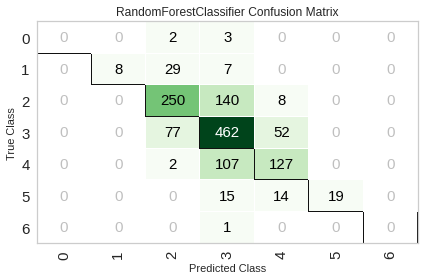

In [22]:
plot_model(tuned_best, plot = 'confusion_matrix')

# 10.2 Classification Report

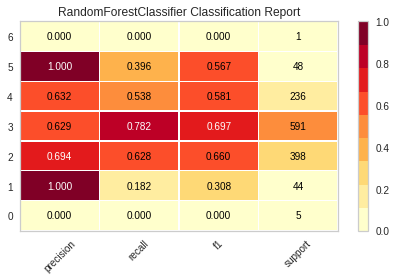

In [23]:
plot_model(tuned_best, plot = 'class_report')

# 10.3 Decision Boundary Plot

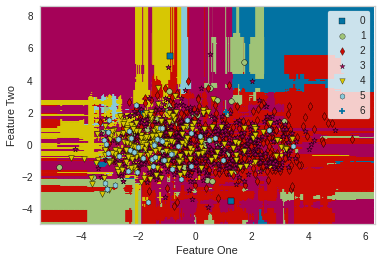

In [24]:
plot_model(tuned_best, plot='boundary')

# 10.4 Prediction Error Plot

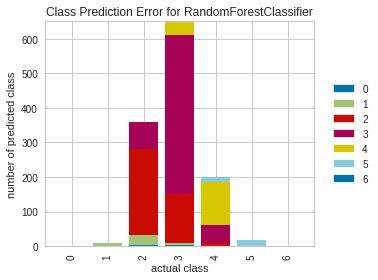

In [25]:
plot_model(tuned_best, plot = 'error')

*Another* way to analyze the performance of models is to use the `evaluate_model()` function which displays a user interface for all of the available plots for a given model. It internally uses the `plot_model()` function. 

# 11.0 Predict on test / hold-out Sample

In [26]:
predict_model(tuned_best);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.6546,0.8411,0.6941,0.6491,0.6578,0.4621,0.4684


# 12.0 Finalize Model for Deployment

Model finalization is the last step in the experiment. A normal machine learning workflow in PyCaret starts with `setup()`, followed by comparing all models using `compare_models()` and shortlisting a few candidate models (based on the metric of interest) to perform several modeling techniques such as hyperparameter tuning, ensembling, stacking etc. This workflow will eventually lead you to the best model for use in making predictions on new and unseen data. The `finalize_model()` function fits the model onto the complete dataset including the test/hold-out sample (30% in this case). The purpose of this function is to train the model on the complete dataset before it is deployed in production.

In [27]:
final_best = finalize_model(tuned_best)

In [28]:
#Final K Nearest Neighbour parameters for deployment
print(final_best)

Pipeline(memory=Memory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['fixed acidity',
                                             'volatile acidity', 'citric acid',
                                             'residual sugar', 'chlorides',
                                             'free sulfur dioxide',
                                             'total sulfur dioxide', 'density',
                                             'pH', 'su...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                              

# 13.0 Predict on unseen data

The `predict_model()` function is also used to predict on the unseen dataset. The only difference from section 11 above is that this time we will pass the `data_unseen` parameter. `data_unseen` is the variable created at the beginning of the tutorial and contains 10% (15 samples) of the original dataset which was never exposed to PyCaret. (see section 5 for explanation)

In [29]:
unseen_predictions = predict_model(final_best, data=data_unseen)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7143,0.8778,0.7286,0.7062,0.7102,0.5559,0.5598


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,prediction_label,prediction_score
0,8.1,0.28,0.40,6.900000,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,6,0.89
1,7.0,0.27,0.36,20.700001,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,6,0.71
2,8.6,0.23,0.40,4.200000,0.035,17.0,109.0,0.9947,3.14,0.53,9.7,5,6,0.54
3,6.6,0.16,0.40,1.500000,0.044,48.0,143.0,0.9912,3.54,0.52,12.4,7,6,0.34
4,7.4,0.34,0.42,1.100000,0.033,17.0,171.0,0.9917,3.12,0.53,11.3,6,6,0.40


The `Label` and `Score` columns are added onto the `data_unseen` set. Label is the prediction and score is the probability of the prediction. Notice that predicted results are concatenated to the original dataset while all the transformations are automatically performed in the background.

# 14.0 Saving the model

In [30]:
save_model(final_best,'Final Best Model 03Dec2022')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['fixed acidity',
                                              'volatile acidity', 'citric acid',
                                              'residual sugar', 'chlorides',
                                              'free sulfur dioxide',
                                              'total sulfur dioxide', 'density',
                                              'pH', 'su...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='auto',
               

# 15.0 Loading the saved model

To load a saved model at a future date in the same or an alternative environment, we would use PyCaret's `load_model()` function and then easily apply the saved model on new unseen data for prediction.

In [31]:
saved_final_best = load_model('Final Best Model 03Dec2022')

Transformation Pipeline and Model Successfully Loaded


Once the model is loaded in the environment, you can simply use it to predict on any new data using the same `predict_model()` function. Below we have applied the loaded model to predict the same `data_unseen` that we used in section 13 above.

In [32]:
new_prediction = predict_model(saved_final_best, data=data_unseen)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7143,0.8778,0.7286,0.7062,0.7102,0.5559,0.5598


In [33]:
new_prediction.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,prediction_label,prediction_score
0,8.1,0.28,0.40,6.900000,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,6,0.89
1,7.0,0.27,0.36,20.700001,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,6,0.71
2,8.6,0.23,0.40,4.200000,0.035,17.0,109.0,0.9947,3.14,0.53,9.7,5,6,0.54
3,6.6,0.16,0.40,1.500000,0.044,48.0,143.0,0.9912,3.54,0.52,12.4,7,6,0.34
4,7.4,0.34,0.42,1.100000,0.033,17.0,171.0,0.9917,3.12,0.53,11.3,6,6,0.40


# 16.0 Wrap-up / Next Steps?

For next steps, I'm interested in knowing more about the other models that are available and also research about the other libraries that could be used to carry out similar tasks.